# Totally Accurate Warhammer Simulator

Inspired by the question, "What's the better value? A unit of 10 Liberators with paired Hammers at 200 points or a unit of 5 Retributors at 220 points?"

The real answer is, of course, it depends. 

Can all your Liberators get into combat? But you can't take 2.5 Retributors into combat for 110 points either.

But we're ignoring all that and having fun!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
import battletome.stormcast as stormcast

## Liberator vs Liberator

Your "_hammer_ and board" Liberator vs your Dual Wielding Liberator vs your Two-Handed Liberator

In [3]:
standard = stormcast.Liberator()
print(standard.describe())

Liberator (Warhammer and Sigmarite Shield) [2/2]
A:2, H:4+, W:3+, R:-, D:1


In [4]:
dual_wielding = stormcast.Liberator(has_paired=True)
print(dual_wielding.describe())

Liberator (Paired Warhammers) [2/2]
A:2, H:4+, W:3+, R:-, D:1


In [5]:
two_handed = stormcast.Liberator(weapon=2)
print(two_handed.describe())

Liberator (Grandhammer) [2/2]
A:2, H:4+, W:3+, R:-1, D:2


### The Challenge

Each unit will have 3 liberators of the same type against an enemy of Save 4+, no modifiers.

Simulated 100,000 times

In [6]:
data = pd.concat([pd.DataFrame({"damage": range(13),
                                "frequency": np.bincount(standard.attack(3, size=100000), minlength=13),
                                "unit": "Hammer and Shield"}),
                  pd.DataFrame({"damage": range(13),
                                "frequency": np.bincount(dual_wielding.attack(3, size=100000), minlength=13),
                                "unit": "Paired Hammers"}),
                  pd.DataFrame({"damage": range(13),
                                "frequency": np.bincount(two_handed.attack(3, size=100000), minlength=13),
                                "unit": "Grandhammers"})])
print(len(data))
data[:3]

39


,damage,frequency,unit
0,0,33604,Hammer and Shield
1,1,39949,Hammer and Shield
2,2,20111,Hammer and Shield


Text(0.5, 1.0, 'Comparing Damage of Units of 3 Liberators\nSave 4+')

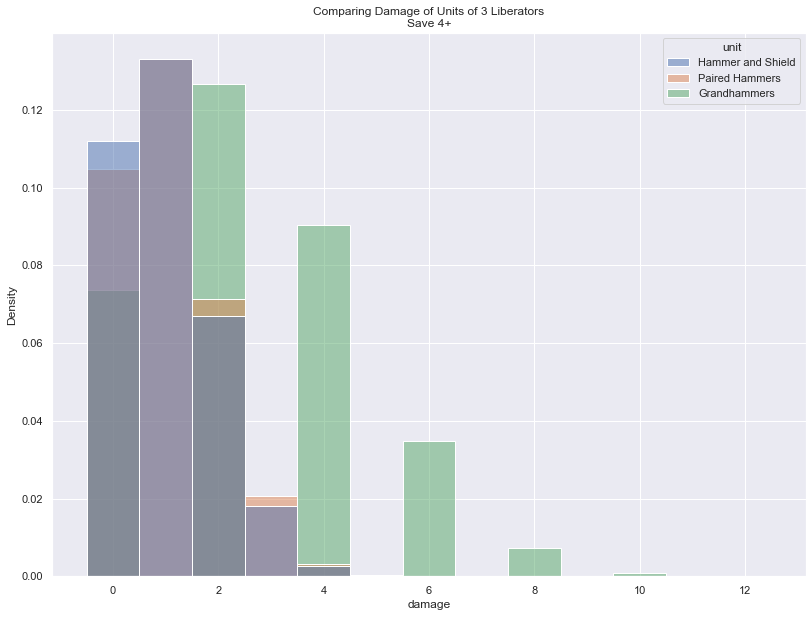

In [7]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 10)
sns.histplot(data=data, x="damage", hue="unit", weights="frequency", bins=13, discrete=True, stat="density")
ax.set_title("Comparing Damage of Units of 3 Liberators\n"
             "Save 4+")

Which is what we expect, the next step here would be to incorporate survivability.

### Hammers vs Swords

Are the implements of Sigmar worth using or should they be tossed aside for cold steel

In [8]:
dual_hammers = stormcast.Liberator(has_paired=True)
print(dual_hammers.describe())

Liberator (Paired Warhammers) [2/2]
A:2, H:4+, W:3+, R:-, D:1


In [9]:
dual_blades = stormcast.Liberator(weapon=1, has_paired=True)
print(dual_blades.describe())

Liberator (Paired Warblades) [2/2]
A:2, H:3+, W:4+, R:-, D:1


In [10]:
data = pd.concat([pd.DataFrame({"damage": range(7),
                                "frequency": np.bincount(dual_hammers.attack(3, size=100000), minlength=7),
                                "unit": "Paired Warhammers"}),
                  pd.DataFrame({"damage": range(7),
                                "frequency": np.bincount(dual_blades.attack(3, size=100000), minlength=7),
                                "unit": "Paired Warblades"})])
print(len(data))
data[:3]

14


,damage,frequency,unit
0,0,31508,Paired Warhammers
1,1,40165,Paired Warhammers
2,2,21183,Paired Warhammers


Text(0.5, 1.0, 'Comparing Damage of Units of 3 Liberators\nSave 4+')

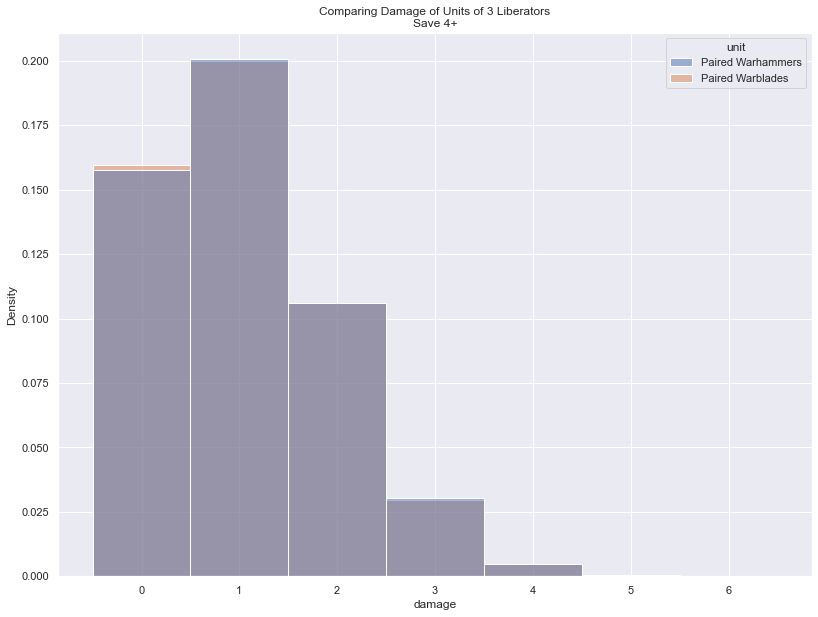

In [11]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 10)
sns.histplot(data=data, x="damage", hue="unit", weights="frequency", bins=7, discrete=True, stat="density")
ax.set_title("Comparing Damage of Units of 3 Liberators\n"
             "Save 4+")

Interestingly "Paired Warhammers" does _slightly_ better than "Paired Warblades", looks like Sigmar was right all along.